# Лабораторная работа 4

## Нейронные сети типа перцептрон
2. Цель работы:

    1. Изучение теоретических основ нейронных сетей и концепции перцептрона.

    2. Реализация простой модели перцептрона и обучение её на подготовленных данных.

    3. Анализ результатов обучения и проверка эффективности модели.

3. Задачи работы:

    1. Понять основные теоретические концепции, лежащие в основе работы и обучения нейронных сетей типа перцептрон. Включая понятия перцептрона, многослойного перцептрона, процесса обучения, функции активации и алгоритма обратного распространения ошибки.

    2. Смоделировать и обучить многослойный перцептрон для аппроксимации определенной функции (в зависимости от конкретного задания). Обучение должно включать подготовку тренировочных и тестовых данных, определение структуры сети (количество слоев и нейронов), выбор функции активации и алгоритма обучения.

    3. Оценить качество обучения нейронной сети на тестовых данных.

    4. Проанализировать влияние различных параметров сети (например, количество слоев, количество нейронов в слое, тип функции активации) на качество обучения.

    5. Провести анализ полученных результатов, сделать выводы о применимости многослойного перцептрона для задачи аппроксимации функции.

# Выполнение работы

#### Вариант 5. 

Смоделировать и обучить нейросеть, аппроксимирующую функцию y = cos(x) + x на отрезке от -5 до 5. Произвести оценку полученных результатов на тестовой выборке.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/davidmalevic/projects/machine-learning-labs/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


1. Подготовка данных. Для обучения перцептрона требуется набор данных, который включает в себя входные значения и соответствующие им целевые значения.

In [2]:
# Параметры данных
x_train = np.linspace(-5, 5, 100).reshape(-1, 1)  # Входные данные
y_train = np.cos(x_train) + x_train               # Целевые значения

2. Инициализация весов.

In [3]:
# Создание модели нейросети
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1)
])

/Users/davidmalevic/projects/machine-learning-labs/env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Обучение перцептрона. На данном этапе для оптимизации весов перцептрона можно выбрать любой оптимизатор. Например, Adam.

In [4]:
# Компиляция модели
model.compile(optimizer='adam', loss='mse')

# Обучение модели
epochs = 1000
history = model.fit(x_train, y_train, epochs=epochs, verbose=0)

4. Тестирование перцептрона. После обучения перцептрон протестировать на новых данных, чтобы оценить его эффективность.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


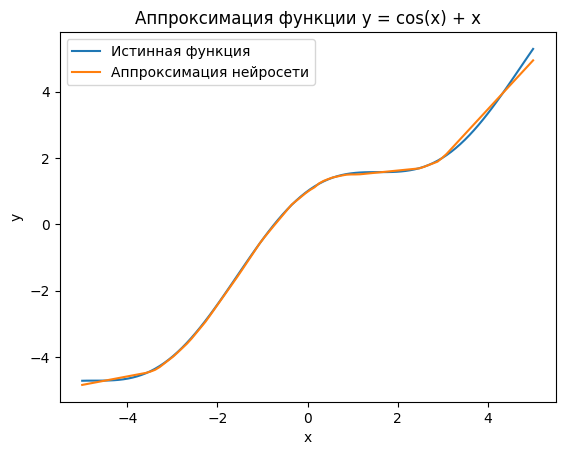

In [5]:
# Тестирование модели
y_pred = model.predict(x_train)

# Визуализация результатов
plt.plot(x_train, y_train, label='Истинная функция')
plt.plot(x_train, y_pred, label='Аппроксимация нейросети')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Аппроксимация функции y = cos(x) + x")
plt.show()

Вот ответы на ваши вопросы о перцептроне:

### 1. Что такое перцептрон?

Перцептрон — это простейшая форма искусственной нейронной сети, предназначенная для решения задач бинарной классификации. Он был предложен Фрэнком Розенблаттом в 1958 году. Перцептрон принимает входные данные, обрабатывает их с помощью весов и пороговой функции, чтобы выдать решение (обычно 0 или 1).

### 2. Какие элементы включает в себя структура перцептрона?

Структура перцептрона состоит из следующих основных элементов:

- Входные нейроны: Каждый входной параметр (признак) представлен отдельным нейроном.
- Веса: Каждому входу соответствует вес, который определяет его важность. Веса могут быть как положительными, так и отрицательными.
- Сумматор: Компонент, который вычисляет взвешенную сумму входов (умножает каждое входное значение на соответствующий вес и складывает результаты).
- Функция активации: Применяется к выходу сумматора, чтобы принять решение о том, должен ли перцептрон активироваться (например, использовать пороговую функцию, такую как сигмоида или шаговую функцию).
- Выходной нейрон: Выдает окончательный результат (0 или 1) на основе активации.

### 3. Каким образом происходит обучение перцептрона?

Обучение перцептрона происходит следующим образом:

1.	Инициализация: Сначала случайно инициализируются веса.
2.	Обработка обучающих данных: Для каждого примера из обучающего набора:
	- Вычисляется выход перцептрона (взвешенная сумма входов).
	- Применяется функция активации, чтобы получить предсказание.
3.	Обновление весов: Если предсказание неверно, веса корректируются на основе ошибки

### 4. Как проверить эффективность обученного перцептрона?

Эффективность обученного перцептрона можно проверить несколькими способами:

1.	Тестирование на отложенной выборке: Используйте отдельный набор данных, который не использовался во время обучения, чтобы проверить, насколько точно перцептрон классифицирует новые примеры.
2.	Метрики оценки:
	- Точность (accuracy): доля правильно классифицированных примеров к общему числу примеров.
	- Точность (precision), полнота (recall) и F-мера: используются для оценки качества классификации, особенно в задачах с несбалансированными классами.
3.	Кросс-валидация: Разделите данные на несколько частей и обучайте модель на одной части, а тестируйте на другой. Повторите это несколько раз, чтобы получить более надежные оценки.
4.	Построение матрицы путаницы: Позволяет визуализировать количество правильных и неправильных предсказаний для каждой категории.

Эти шаги позволяют оценить, насколько хорошо перцептрон научился различать классы и насколько он обобщает на новых данных.